# Label Data
- Take in screenshots of game
- Grab balls and save crops of individual balls
- User input for labeling and grouping ball types into their own folders

In [1]:
import project
import cv2
import numpy as np
import matplotlib.pyplot as plt
import json
from scipy.stats import norm
from pathlib import Path

constants = json.load(open('constants.json'))
print(constants.keys())

dict_keys(['playable_area', 'pockets'])


/home/dchen327/coding/hmc/cv/pool-agent/project.py:15: RuntimeWarning: divide by zero encountered in divide
  return R/B, G/B
/home/dchen327/coding/hmc/cv/pool-agent/project.py:15: RuntimeWarning: invalid value encountered in divide
  return R/B, G/B


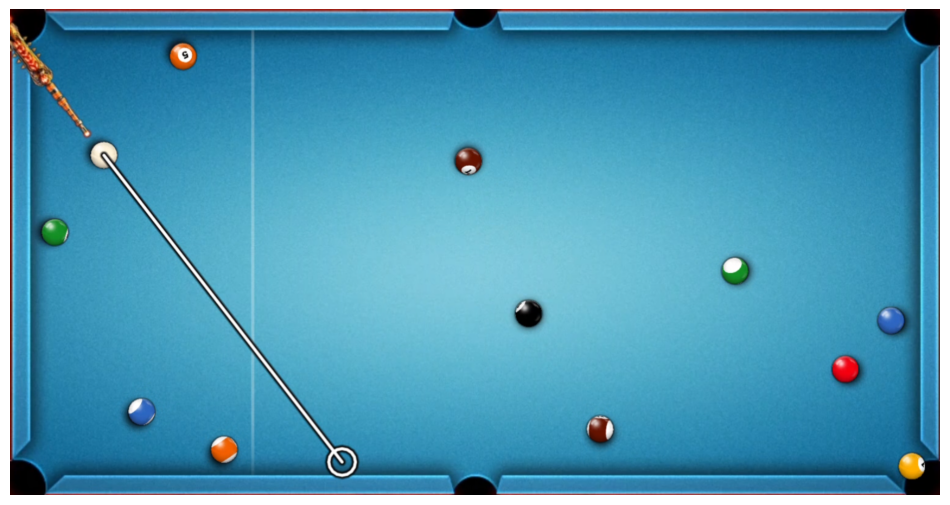

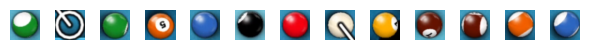

In [2]:
# demo of screenshot -> crop individual balls
img = cv2.imread('screenshots/screenshot_0.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# crop image to playable area
img = img[constants['playable_area']['top_left'][1]:constants['playable_area']['bottom_right'][1],
            constants['playable_area']['top_left'][0]:constants['playable_area']['bottom_right'][0]]
data = project.generate_data(img, use_blue=True, k_1=2, k_2=1,
                             min_dist=40, canny=20, accum=20, min_radius = 20, max_radius=30)
plt.figure(figsize=(12,10))
plt.imshow(img)
plt.axis('off')
plt.show()

n_plots = len(data)
fig, axes = plt.subplots(1, n_plots, figsize=(6,6))

for i in range(n_plots):
    axes[i].imshow(data[i])
    axes[i].axis('off')
plt.tight_layout()
plt.show()

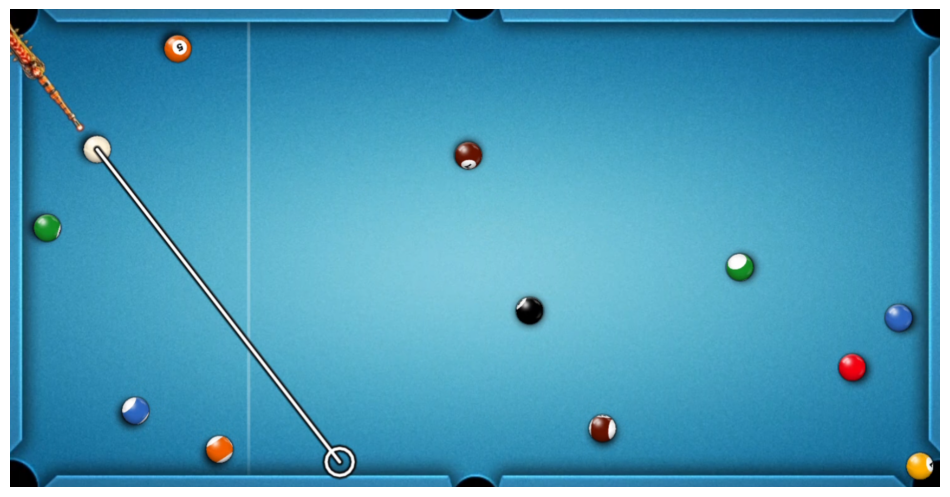

Processed screenshots/screenshot_0.png and saved 13 balls to labeling/unlabeled


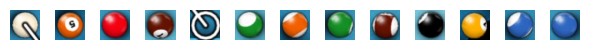

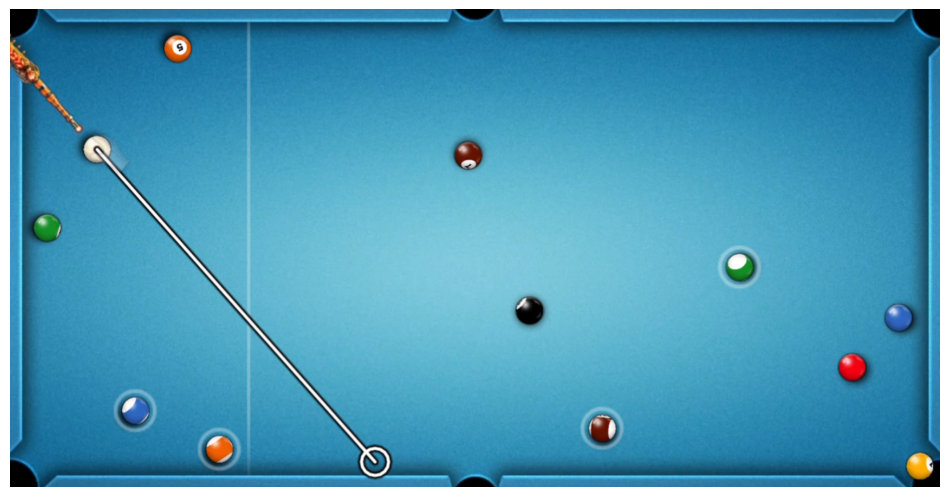

Processed screenshots/screenshot_1.png and saved 12 balls to labeling/unlabeled


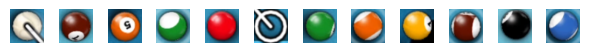

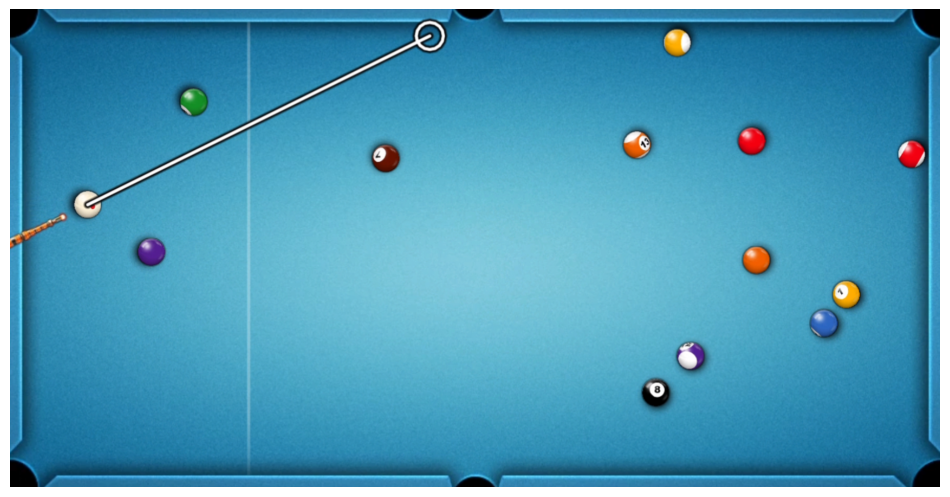

Processed screenshots/screenshot_10.png and saved 14 balls to labeling/unlabeled


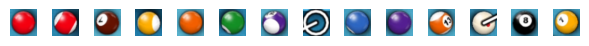

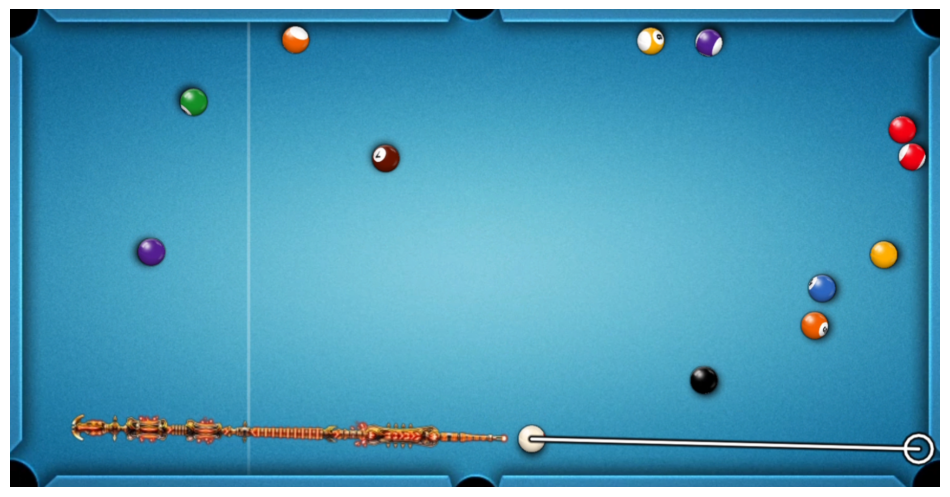

Processed screenshots/screenshot_11.png and saved 10 balls to labeling/unlabeled


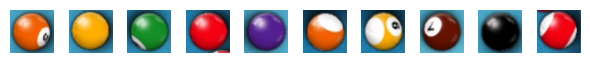

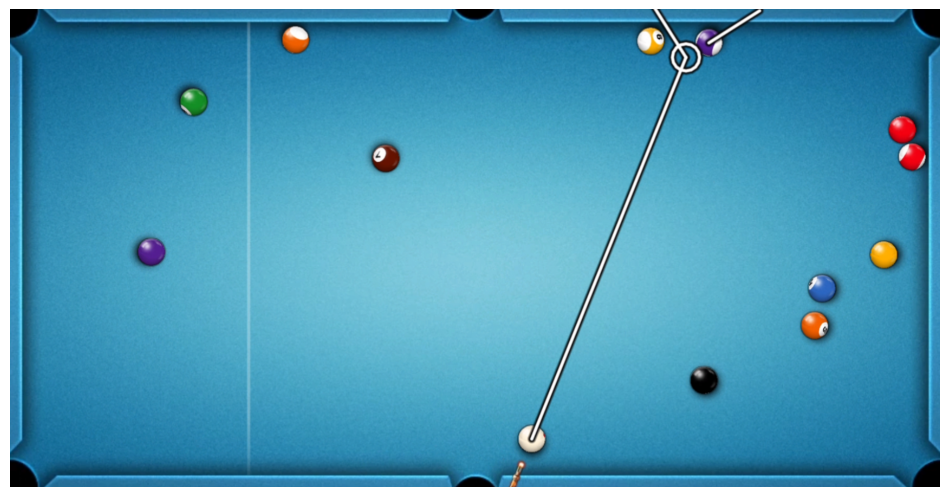

Processed screenshots/screenshot_12.png and saved 14 balls to labeling/unlabeled


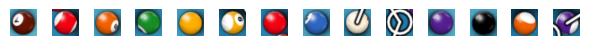

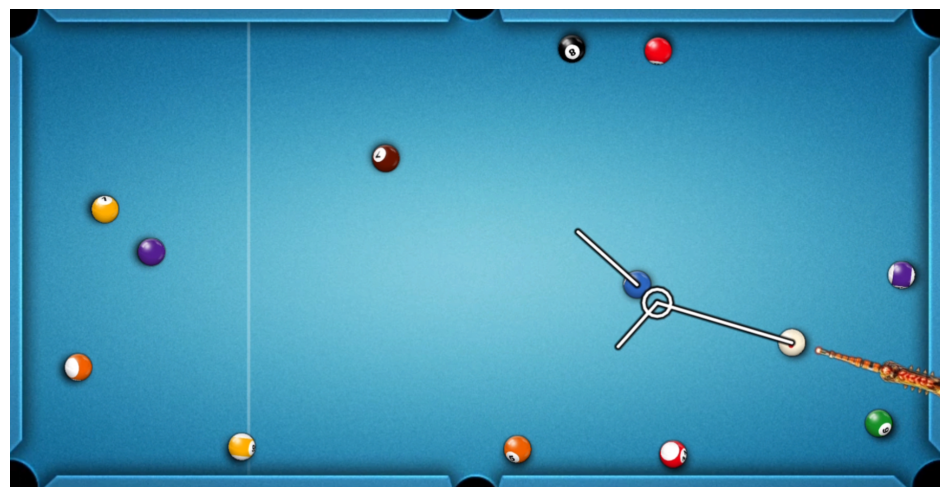

Processed screenshots/screenshot_13.png and saved 13 balls to labeling/unlabeled


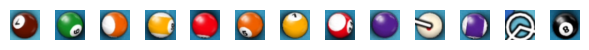

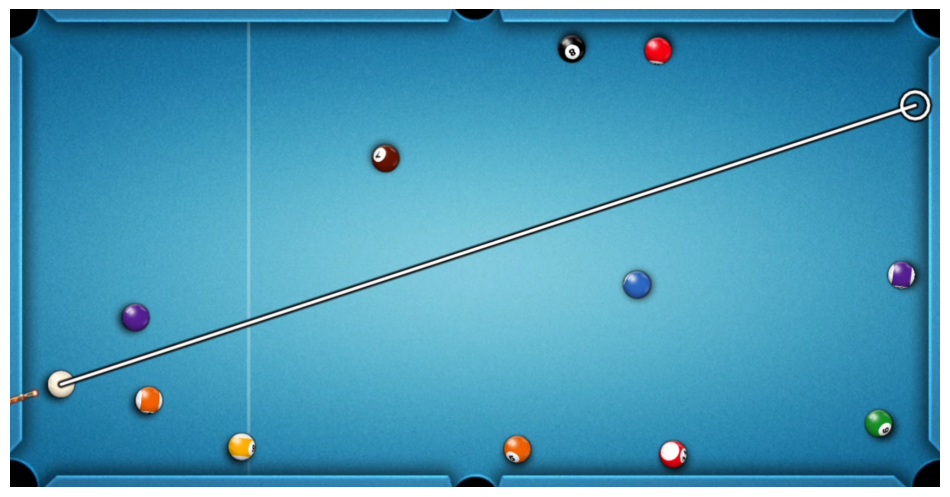

Processed screenshots/screenshot_14.png and saved 13 balls to labeling/unlabeled


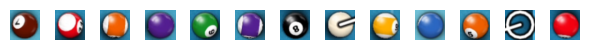

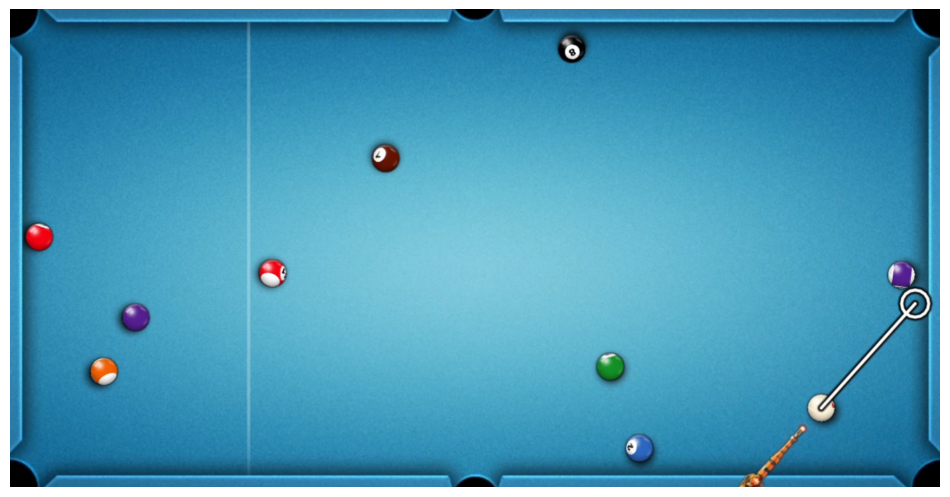

Processed screenshots/screenshot_15.png and saved 11 balls to labeling/unlabeled


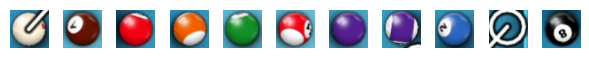

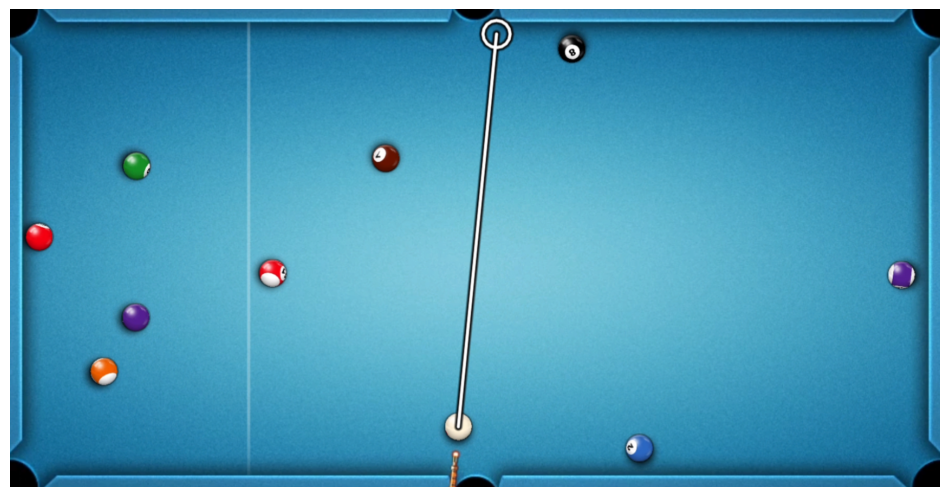

Processed screenshots/screenshot_16.png and saved 11 balls to labeling/unlabeled


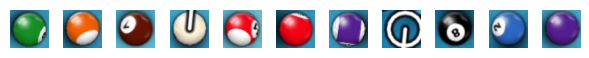

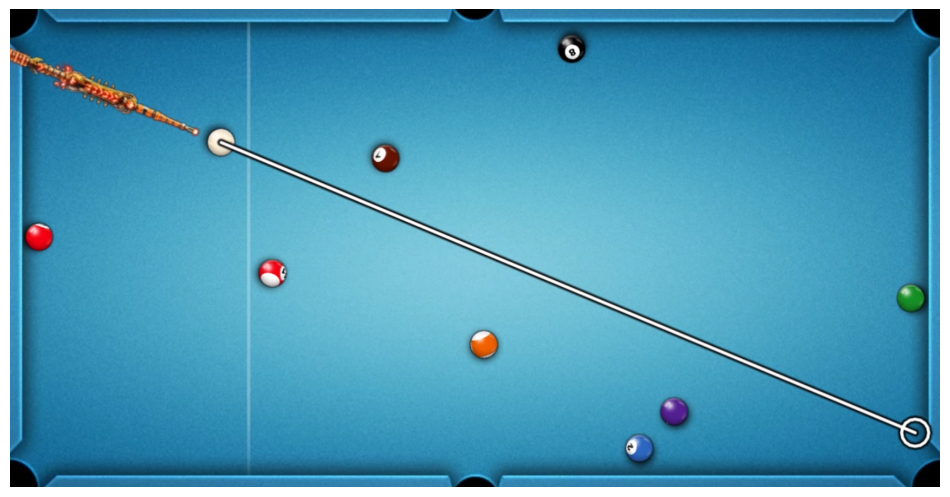

Processed screenshots/screenshot_17.png and saved 10 balls to labeling/unlabeled


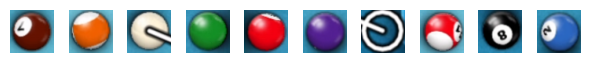

In [3]:
# take images from screenshots directory -> crop individual balls
screenshots_dir = Path('./screenshots')
unlabeled_dir = Path('./labeling/unlabeled')
if not unlabeled_dir.exists():
    unlabeled_dir.mkdir()
screenshots = sorted(screenshots_dir.glob('screenshot_*.png'))

# get highest numbered unlabeled ball to count upward
file_counter = 0
unlabeled_balls = sorted(unlabeled_dir.glob('ball_*.png'))
if len(unlabeled_balls) > 0:
    unlabeled_balls = [int(str(ball).split('_')[1].split('.')[0]) for ball in unlabeled_balls]
    file_counter = max(unlabeled_balls)


for screenshot in screenshots[:10]:
    img = cv2.imread(str(screenshot))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # crop image to playable area
    img = img[constants['playable_area']['top_left'][1]:constants['playable_area']['bottom_right'][1],
              constants['playable_area']['top_left'][0]:constants['playable_area']['bottom_right'][0]]
    # crop image by another 5px on each side
    img = img[15:-15, 15:-15]
    # show image
    plt.figure(figsize=(12,10))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    data = project.generate_data(img, use_blue=True, k_1=2.5, k_2=1.5,
                                 min_dist=48, canny=100, accum=20, min_radius=23, max_radius=27)
    # save all individual balls to unlabeled directory
    for i, ball in enumerate(data):
        # save ball image
        file_counter += 1
        filename = unlabeled_dir / f'ball_{file_counter}.png'
        # write bgr
        ball = cv2.cvtColor(ball, cv2.COLOR_RGB2BGR)
        # save
        cv2.imwrite(str(filename), ball)
    
    print(f'Processed {screenshot} and saved {len(data)} balls to {unlabeled_dir}')
    # show all balls
    n_plots = len(data)
    fig, axes = plt.subplots(1, n_plots, figsize=(6,6))
    for i in range(n_plots):
        axes[i].imshow(data[i])
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

    